In [2]:
%matplotlib inline
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('Acceptance.csv')

This is just to import the necessary libraries that I'm going to need for my model and using pandas to import and read the CSV containing my dataset.

In [3]:
filtered_data = df.drop(columns=['application_id', 'gender', 'international', 'race', 'work_industry']) # Here I am dropping the columns that are not needed for the decision tree
filtered_data.loc[filtered_data['admission'].isnull() | (filtered_data['admission'] == ''), 'admission'] = 'Rejected' # This line was obtained from ChatGPT and it's used to replace the empty and null values with 'Rejected' in the admission column
filtered_data.to_csv('filtered_data.csv')
X = filtered_data[['gpa', 'gmat']]
Y = filtered_data['admission']


In this code block I am filtering my data to remove the values that aren't necessary for the model and extracting it into it's own csv

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=258)

This is just to seperate my test data from my training data so that my model can be trained and tested appropriately, I am splitting it 80% training and 20% testing data

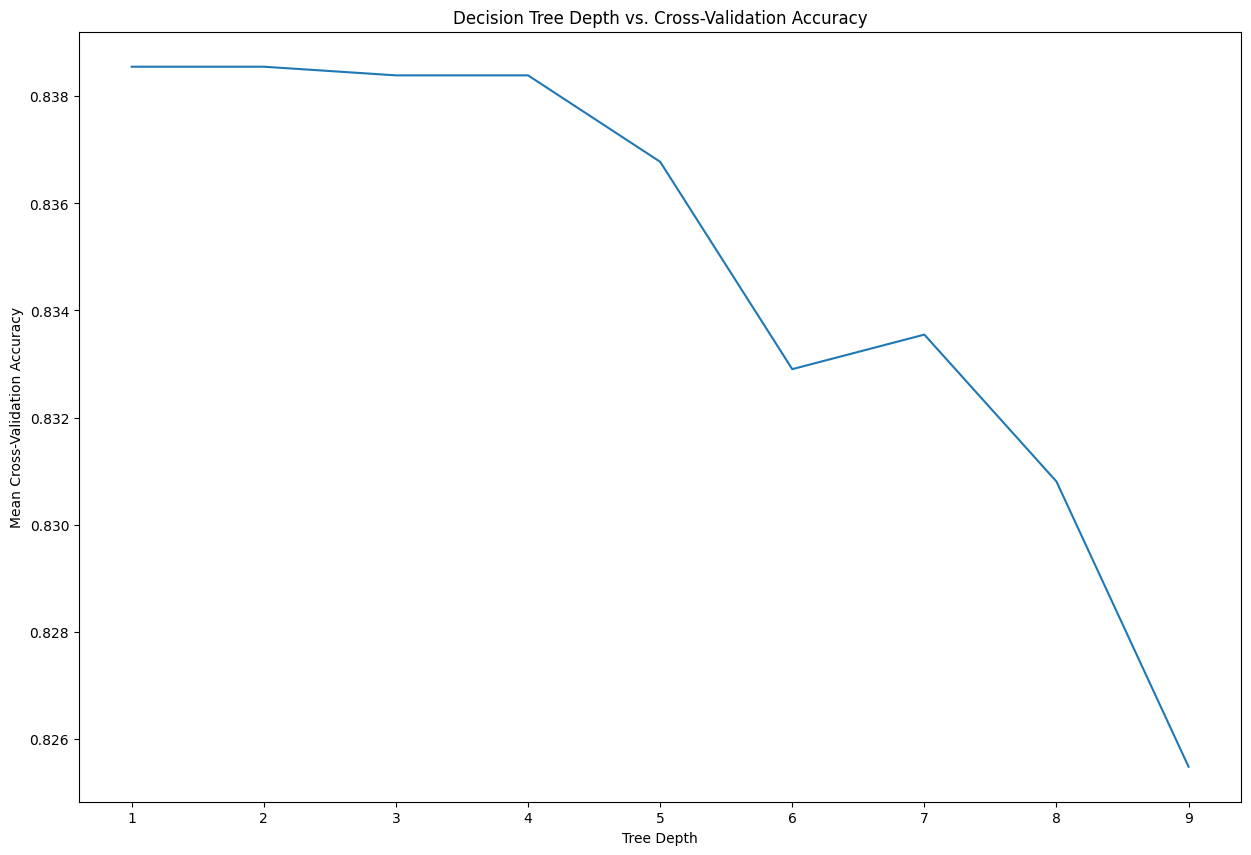

In [5]:
# Define a range of depths to evaluate
depths = range(1, 10)  # Test depths from 1 to 20
mean_scores = []

# Evaluate each depth using cross-validation
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(decision_tree, X, Y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_scores.append(scores.mean())  # Store the mean accuracy for each depth

# Plot the results
plt.figure(figsize=(15, 10))
plt.plot(depths, mean_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Decision Tree Depth vs. Cross-Validation Accuracy')
plt.show()

This code block was obtained from ChatGPT and it's used to plot the graph of the decision tree depth vs cross-validation accuracy to help figure out what the best depth for the decision tree is. This is helpful as it will give me the best and most accurate model for my data. Based off of the calculations it seems that 2 is the most effective depth for this dataset.

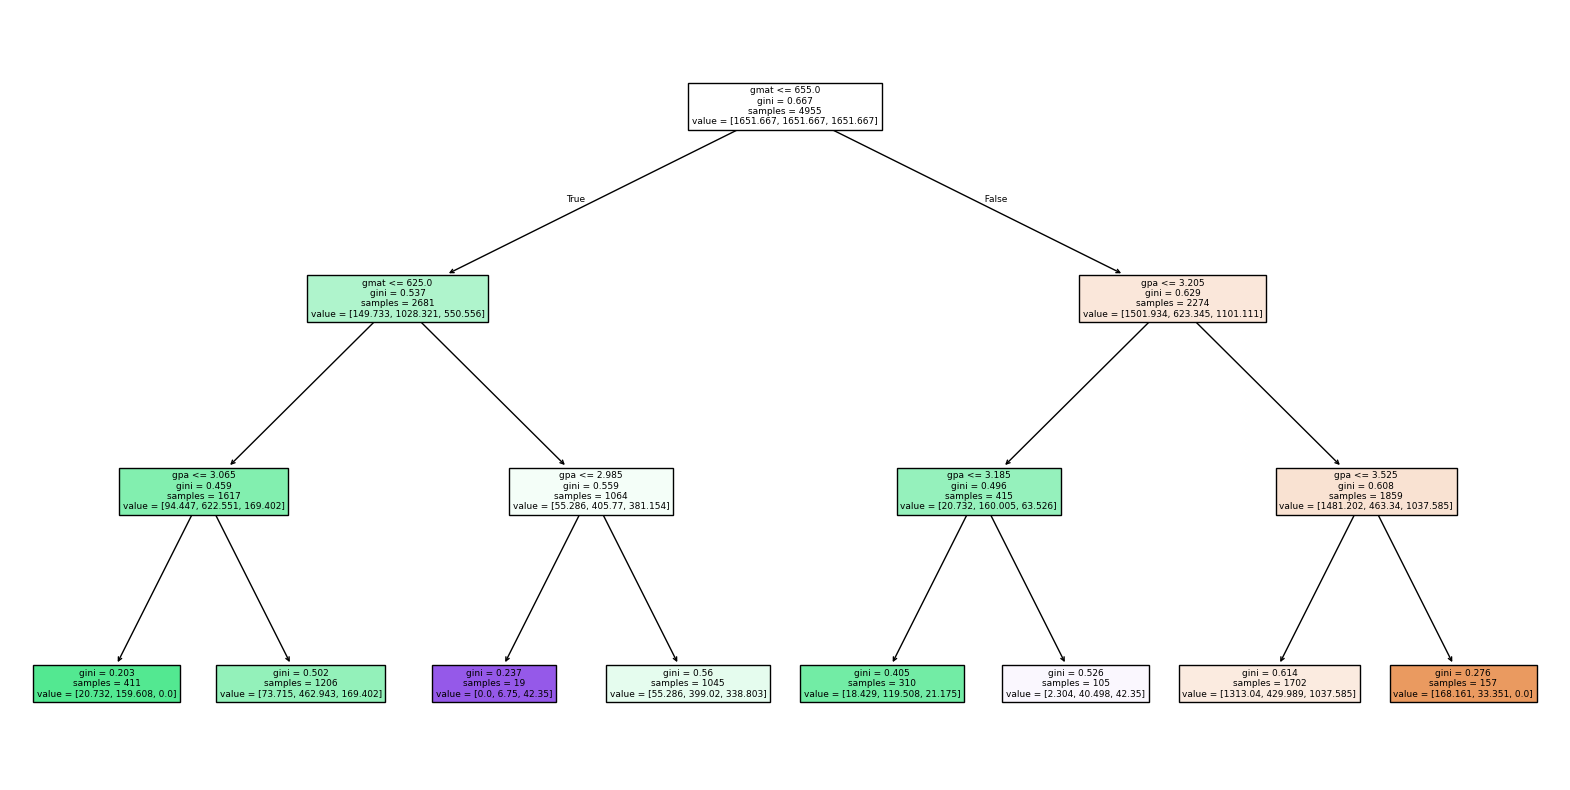

In [6]:
decision_tree = DecisionTreeClassifier(max_depth=3, class_weight="balanced") # I obtained class_weight="balanced" from ChatGPT and it's used to handle the imbalanced dataset
decision_tree = decision_tree.fit(x_train, y_train)

plt.figure(figsize=(20, 10)) # This line is used to set the size of the decision tree plot to make it more visible and readable
tree.plot_tree(decision_tree, feature_names=['gpa', 'gmat'], filled=True)
plt.show()

In this code block I am displaying the decision tree containing my data. I have had to use class_weight in this as due to this college only having a 16% acceptance rate, it leads to the model becoming very unbalanced due to having around 84% of all applications being rejected or waitlisted. Before I added this line, I was getting every prediction result as rejected due to the model being trained to respond with rejected responses due to their volume and not take the factors into account.

In [8]:
decision_tree.fit(x_train, y_train)

predictions = decision_tree.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
accuracy_percentage = accuracy * 100  

print('The accuracy of the decision tree model is: ', accuracy_percentage, '%')

The accuracy of the decision tree model is:  70.29862792574657 %


In this block, I am now using the test data which I seperated from the training data earlier to now get how accurate the model is, this works by getting all the correct results and dividing that by the wrong results, I am using SciKit-Learns accuracy score to figure this out.

In [ ]:
# Example new sample data
example_prediction = pd.DataFrame({'gpa': [3.5], 'gmat': [800]}) # I obtained this line from ChatGPT and it's used to create new sample data for a prediction

# Make a prediction
prediction = decision_tree.predict(example_prediction)
print("This student would be:", prediction[0])

This code block is using a random sample piece of data to make a prediction based off of the training that the model has done form the data in the csv file.

# Data Overview

This data was obtained from Kaggle from this link (https://www.kaggle.com/datasets/taweilo/mba-admission-dataset). This synthetic dataset is centred around making a decision tree model which will be able to predict whether a student will be either accepted or rejected from a fictional college based off of different factors from the dataset. I chose this dataset as I thought it would be interesting to see what are the main factors that would affect acceptance rates into this college.

# Pre Processing
There was some pre-processing for this dataset. The first main issue that I had to tackle was that if a student was rejected from the college the result flag would just be left empty instead of saying rejected, the only ones that were written down is if they were accepted or waitlisted, so to fix this I had to check for every instance where the admission field was null or empty and add in 'Rejected'. However this led to my next big issue, due to the college having around a 15% acceptance rate, when I was training the model it became trained to automatically reject all the applicants becasue of the imbalance in the data even if they had the best results in their exam and GPA. I overcame this by adjusting the class weight in the data which makes the model even out the datasets from the imbalance to give a more accurate prediction for acceptance.

# Data Understanding
I now have a good understanding of the dataset that I have chosen and what factors are most prominent when accepting a student to college. The 2 factors which seem to have a major affect on the acceptace are the GPA and GMAT scores. The GMAT is a standard test in the USA that is required for admission to certain colleges and a students GPA is their grade point average so its the overall of their results throughout college/ high school. These were the only two that seemed to have a noticeable affect on the data, I tried other factors such as years of work experience, race , gender and their major but none of these seemed to affect the prediction at all which I found intereseting as I thought that work experience would have held more weight for a students chances of acceptance as it shows a good attitude to apply themselves. I also thought that major might've had an affect because of course space limitations but this also didn't seem to be the case.

# Algorithm
For this model I implemented a decision tree model using Sci-Kit Learn's Decision Tree model, I used this model as its a binary result for my data as it has to be one of three options: Accepted, Rejected or Waitlisted. This model has a 70% accuracy rating which for predicting college acceptance rates is quite good and would be a useful tool for students who are planning to choose where to apply to college for to see their chances of getting in to their desired colleges. This could potentially be furthered into a model where you could enter your details and then it would be able to predict what colleges across the country you would likely be accepted or rejected from.

# Technologies Used
I used a few different technologies whilst creating this model such as Pandas which allowed me to read in my dataset and then I used a few of Sci-Kit Learn's tools to build my Decision Tree model such as their accuracy score, cross val score, their train and test split and of course their decision tree model.


